# linear regression

In [38]:
data = pd.read_csv('ecommerce.csv')
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [41]:
data.info()     # 데이터 정보. 인덱스와 칼럼의 데이터 개수/ 종류 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [42]:
data.describe()     # 데이터 통계 정보. 수치형 데이터(int, float)가 들어있는 칼럼의 기초통계량 확인

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


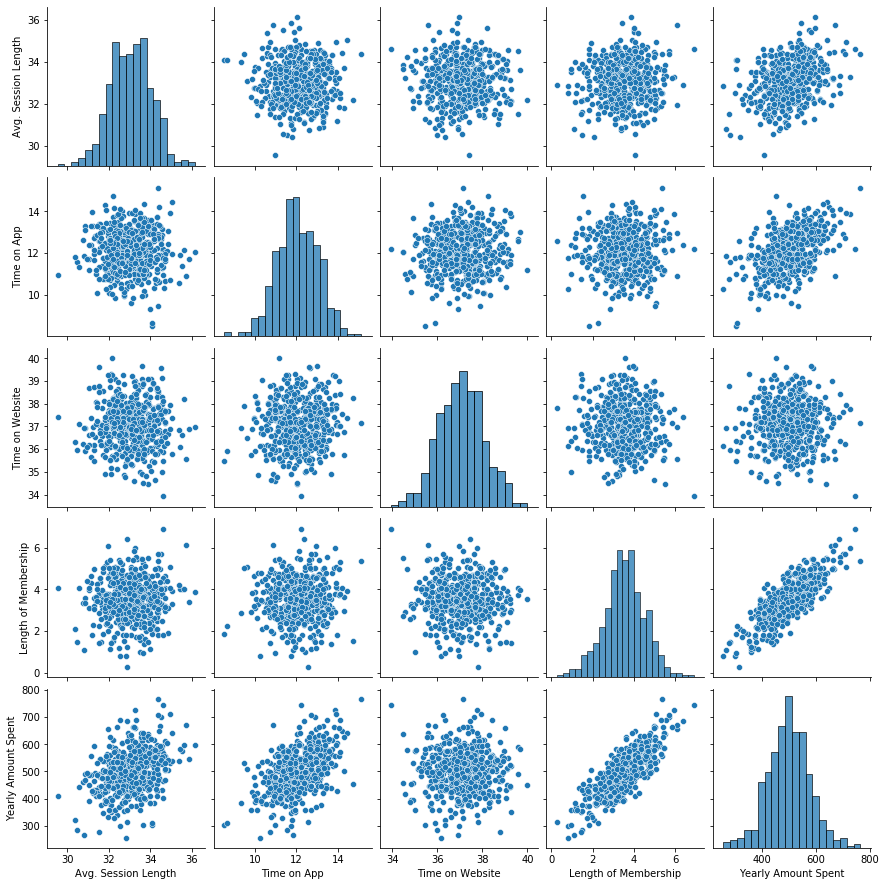

In [43]:
sns.pairplot(data)     # 변수간 관계 확인

In [45]:
data = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
data.head()     # 필요한 칼럼만 가져와서 data에 저장
# data.drop(['Email', 'Address', 'Avatar'], axis = 1, inplace = True) 이렇게 써도 됨

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [48]:
from sklearn.model_selection import train_test_split     # train set/ test set 나누기

X = data.drop('Yearly Amount Spent', axis = 1)     # 독립변수
# X = data[['Avg.Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]     이렇게 써도 됨
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [49]:
y = data['Yearly Amount Spent']     # 종속변수
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)     # train set을 80%, test set을 20%로

In [51]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
205,34.967610,13.919494,37.952013,5.066697
404,32.278443,12.527472,36.688367,3.531402
337,31.827979,12.461147,37.428997,2.974737
440,33.200616,11.965980,36.831536,3.549036
55,33.925297,11.588655,35.252242,3.392050
...,...,...,...,...
343,32.302748,12.815393,37.957810,4.615426
359,32.054262,13.149670,37.650400,4.195614
323,32.762456,10.952353,37.646292,4.019470
280,32.271848,13.485009,37.550880,3.086337


In [52]:
import statsmodels.api as sm     # linear regression을 불러올 수 있는 다양한 모델 중 하나

In [53]:
model = sm.OLS(y_train, X_train)     # OLS라는 함수를 활용해 linear regression 모델 만들기

In [54]:
model = model.fit()     # 모델 학습

In [55]:
model.summary()     # report 보기

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Thu, 29 Jul 2021   Prob (F-statistic):                        0.00
Time:                         09:46:56   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
predictions = model.predict(X_test)     # 예측 데이터
predictions

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

In [57]:
y_test     # 실제 데이터

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
460    618.845970
152    555.892595
154    595.803819
56     520.898794
392    549.131573
Name: Yearly Amount Spent, Length: 100, dtype: float64

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


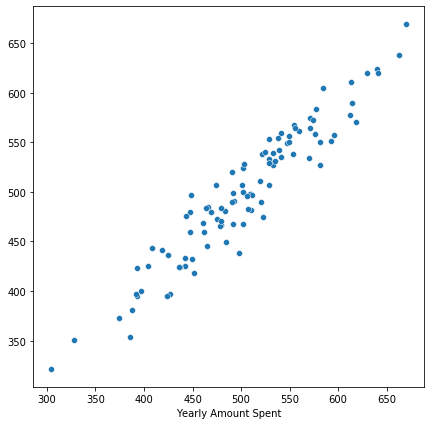

In [58]:
# 예측 데이터(predictions)와 실제 데이터(y_test)를 시각화해서 비교

plt.figure(figsize = (7, 7))
sns.scatterplot(y_test, predictions)

In [59]:
from sklearn.metrics import mean_squared_error     # 평가

In [60]:
print('MSE: ', mean_squared_error(y_test, predictions))     # MSE
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))     # RMSE

MSE:  482.2890139088938
RMSE:  21.96107952512567
